In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
# Download historical price data from Yahoo Finance
def download_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

In [7]:
# Define your portfolio with weights
portfolio = {
    'AAPL': 0.4,
    'MSFT': 0.3,
    'GOOGL': 0.3
}

In [8]:
# Set the time horizon and confidence level
confidence_level = 0.95
time_horizon = 30  # 30 trading days

In [9]:
# Download historical data
start_date = '2022-01-01'
end_date = '2023-01-01'
tickers = list(portfolio.keys())
price_data = download_data(tickers, start_date, end_date)

[*********************100%%**********************]  3 of 3 completed


In [10]:
# Calculate daily returns
returns = price_data.pct_change().dropna()
returns

,AAPL,GOOGL,MSFT
Date,,,
2022-01-04,-0.012692,-0.004083,-0.017147
2022-01-05,-0.026600,-0.045876,-0.038388
2022-01-06,-0.016693,-0.000200,-0.007902
2022-01-07,0.000988,-0.005303,0.000510
2022-01-10,0.000116,0.012061,0.000732
...,...,...,...
2022-12-23,-0.002798,0.016750,0.002267
2022-12-27,-0.013878,-0.020621,-0.007414
2022-12-28,-0.030685,-0.015677,-0.010255


In [11]:
# Calculate portfolio returns
portfolio_returns = returns.dot(pd.Series(portfolio))
portfolio_returns

Date
2022-01-04   -0.011446
2022-01-05   -0.035919
2022-01-06   -0.009108
2022-01-07   -0.001043
2022-01-10    0.003884
                ...   
2022-12-23    0.004586
2022-12-27   -0.013962
2022-12-28   -0.020054
2022-12-29    0.028093
2022-12-30   -0.001240
Length: 250, dtype: float64

In [12]:
# Calculate portfolio VaR using historical simulation
def calculate_var(returns, confidence_level, time_horizon):
    returns = returns * 100  # Convert to percentage
    alpha = 1 - confidence_level
    var = np.percentile(returns, alpha * 100)
    return var * np.sqrt(time_horizon)

In [13]:
# Calculate VaR
var = calculate_var(portfolio_returns, confidence_level, time_horizon)
var

-19.980100822385612

In [14]:
print(f"Portfolio VaR at {confidence_level} confidence level for {time_horizon} days is: {var:.2f}%")

Portfolio VaR at 0.95 confidence level for 30 days is: -19.98%


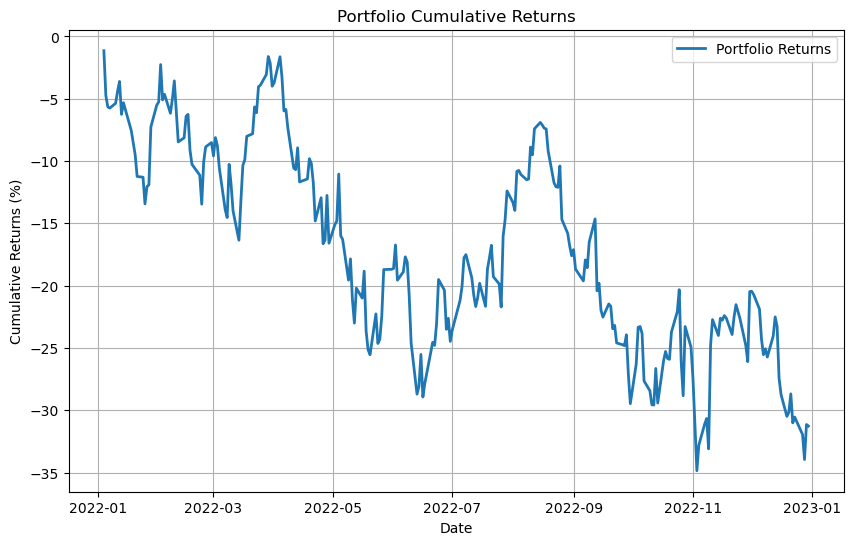

In [15]:
# Plot the portfolio returns
plt.figure(figsize=(10, 6))
plt.plot(portfolio_returns.index, portfolio_returns.cumsum() * 100, label='Portfolio Returns', lw=2)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.title('Portfolio Cumulative Returns')
plt.legend()
plt.grid()
plt.show()